In [68]:
# TODO
# List UK cities not in
# Find most expensive and cheapest relative to living cost? 

In [153]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from pylab import *

In [70]:
df = pd.read_csv('cleaned_data.csv')[['pub_name', 'item_name', 'category', 'item_price']]
df.dropna(inplace=True)
df.info()
df.describe()
df.head
df.sort_values(by='item_price', inplace=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 67279 entries, 0 to 67422
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pub_name    67279 non-null  object 
 1   item_name   67279 non-null  object 
 2   category    67279 non-null  object 
 3   item_price  67279 non-null  float64
dtypes: float64(1), object(3)
memory usage: 2.6+ MB


In [136]:
# print(df)
df[df['category'].str.contains("Spririts")]


,pub_name,item_name,category,item_price


In [71]:
df_by_category = df.groupby('category')
type(df_by_category)
df_by_category.describe()

item_price                                      \
                                 count       mean       std   min      25%   
category                                                                     
All Time Favourites             1659.0  10.772785  0.954395  8.70  10.2000   
Bottled Beer                      76.0   4.248026  0.435694  3.30   3.9375   
Bottled Cider & Other            101.0   4.626733  0.479873  3.65   4.3000   
Bottled Drinks                   588.0   4.337160  0.553917  2.50   3.9500   
Bottled Low & Non-Alcoholic       31.0   3.575806  0.421084  2.75   3.3250   
...                                ...        ...       ...   ...      ...   
White                            243.0   9.992387  5.669000  3.60   5.5500   
Wine                            4192.0   9.222984  7.656038  2.10   4.5500   
Wine by the Bottle               285.0  17.730526  7.604292  3.00  15.0000   
Wine by the Glass                458.0   5.806878  1.258369  3.00   4.8000   
Winter Wamrers                    78.0   3.842949  1.162949  2.25   3.0000   

                                                    
                               50%      75%    max  
category                                            
All Time Favourites          10.55  11.4000  13.55  
Bottled Beer                  4.25   4.5000   5.45  
Bottled Cider & Other         4.70   5.0000   5.45  
Bottled Drinks                4.40   4.7000   5.45  
Bottled Low & Non-Alcoholic   3.55   3.8250   4.45  
...                            ...      ...    ...  
White                         7.00  15.3750  26.00  
Wine                          6.00  13.7500  48.00  
Wine by the Bottle           16.50  18.5000  49.00  
Wine by the Glass             5.75   6.6000  10.40  
Winter Wamrers                3.50   4.6875   6.50  

[76 rows x 8 columns]

In [122]:
df_med_by_category = df_by_category.median()
df_med_by_category.rename(columns={'item_price': 'median_item_price'}, inplace=True)
df_med_by_category

,median_item_price
category,
All Time Favourites,10.55
Bottled Beer,4.25
Bottled Cider & Other,4.70
Bottled Drinks,4.40
Bottled Low & Non-Alcoholic,3.55
...,...
White,7.00
Wine,6.00
Wine by the Bottle,16.50


In [123]:
df_med_by_category.sort_values(by='median_item_price', inplace=True)

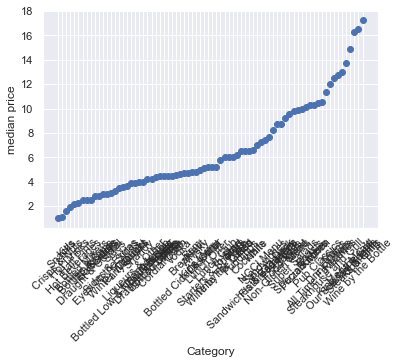

category
Crisps & Nuts          1.05
Snacks                 1.10
Kids                   1.60
Hot Drinks             1.95
Hot Beverages          2.20
                      ...  
King of the Grill     13.70
Mega Meals            14.85
Steaks & Grills       16.25
Wine by the Bottle    16.50
Sparkling             17.25
Name: median_item_price, Length: 76, dtype: float64


In [125]:
df_price_by_category = df_med_by_category['median_item_price']
plt.scatter(df_price_by_category.index, df_price_by_category)
plt.xlabel('Category')
plt.xticks(rotation = 45)
plt.ylabel('median price')
plt.rc('font', size=1)  
plt.show()
print(df_price_by_category)


Text(0, 0.5, 'Median Item Price (£)')

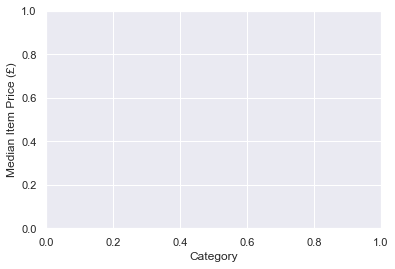

In [162]:
# print(df_med_by_category.columns)
df_med_by_category.to_csv('dataframes/df_med_by_category.csv')
df_med_by_category = pd.read_csv('dataframes/df_med_by_category.csv')
# print(df_med_by_category.columns)
px.box(df, "category", "item_price", labels={"Item Price": "Item Price (Lower Bound)"}, title="Boxplot of Item Price").show()
# plt.ylabel('Item Price (£)')
px.scatter(df_med_by_category, "category", "median_item_price", labels={"Item Price": "Item Price (Lower Bound)"}, title="Scatter Graph of Median Item Price").show()
# plt.xlabel('Category')
# plt.ylabel('Median Item Price (£)')
# print(df_med_by_category)
# print(df)



In [76]:
# Premium products - Carta 23 Chilean Merlot, Castelnau Brut Reserve (max: 49.0, median: 45.25, min: 43.25), Veuve Cliquot NV (max: 47.5, median: 44.75, min: 41.75)
# Questionable? - Warner Edwards Raspberry Gin Double

In [115]:
# Group by pub name
df_by_pub_name = df.groupby('pub_name')
df_med_by_pub_name = df_by_pub_name.median()
print(df_med_by_pub_name)
df_med_by_pub_name.rename(columns={'item_price': 'median_item_price'}, inplace=True)
df_med_by_pub_name.sort_values(by='median_item_price', inplace=True)
df_med_by_pub_name
df_med_by_pub_name.to_csv('df_med_by_pub_name.csv')

                               item_price
pub_name                                 
Admirals Table Bridgwater            4.50
Alders Ollerton                      4.95
Apple Cart Peterborough              4.60
Barn Owl Gloucester                  4.95
Bayberry Swindon                     4.70
...                                   ...
White Horse Skegness                 4.55
Willow Tree Brynmawr                 4.90
Willows Blackburn                    4.95
Y Cerrig Glas Pembroke Dock          4.50
Yorkshire Rose West Yorkshire        4.95

[122 rows x 1 columns]


In [111]:
# Merge price with location data?!
# df_med_by_pub_name.sort_values(by='pub_name', inplace=True)
# print(df_med_by_pub_name)
df_med_by_pub_name = pd.read_csv('df_med_by_pub_name.csv')
df_pub_location = pd.read_csv('pub_location_data.csv')[['pub_name', 'lat', 'lng']]
# df_pub_location.sort_values(by='pub_name', inplace=True)
# print(df_pub_location)
print(df_pub_location)
print(df_med_by_pub_name)


                                 pub_name        lat       lng
0              Viking's Landing Liverpool  53.405472 -2.980539
1           Horn & Trumpet Stoke-on-Trent  53.016201 -2.181261
2                        Elms Lutterworth  52.455222 -1.199782
3                    Skymaster Warrington  53.430250 -2.655810
4                    Blaina Wharf Newport  51.578535 -2.980712
..                                    ...        ...       ...
262  One 0 Four Kitchen & Cocktail Lounge  50.902535 -1.404189
263                       Hardys Hophouse  50.608328 -2.455338
264                 Duke & Rye Chichester  50.836486 -0.779172
265                      White Hart Calow  53.233897 -1.384143
266                         Still Lincoln  53.228982 -0.539794

[267 rows x 3 columns]
                                 pub_name  median_item_price
0                           Poacher Wigan              2.250
1                     Cherry Tree Norwich              2.300
2             New Finney Gardens Buck

In [110]:
df_location_med_price = pd.merge(df_pub_location, df_med_by_pub_name)
df_location_med_price
df_location_med_price.to_csv('df_med_price_by_location.csv')


In [173]:
# group by category
df_by_category = df.groupby('category')
df_med_by_category = df_by_category.median()
df_med_by_category
# print(df_med_by_pub_name)
# df_med_by_pub_name.rename(columns={'item_price': 'median_item_price'}, inplace=True)
# df_med_by_pub_name.sort_values(by='median_item_price', inplace=True)
# df_med_by_pub_name
# df_med_by_pub_name.to_csv('df_med_by_pub_name.csv')

,item_price
category,
All Time Favourites,10.55
Bottled Beer,4.25
Bottled Cider & Other,4.70
Bottled Drinks,4.40
Bottled Low & Non-Alcoholic,3.55
...,...
White,7.00
Wine,6.00
Wine by the Bottle,16.50


In [263]:
# df_burgers = pd.read_csv('dataframes/df_burgers.csv')[['pub_name','address','category','item_name','item_price','opening_times']]
df_burgers = pd.read_csv('dataframes/df_burgers.csv')[['pub_name','item_name','item_price']]
# df_draught = pd.read_csv('dataframes/df_draught.csv')[['pub_name','address','category','item_name','item_price','opening_times']]
df_draught = pd.read_csv('dataframes/df_draught.csv')[['pub_name','item_name','item_price']]
df_soft = pd.read_csv('dataframes/df_soft.csv')[['pub_name','address','category','item_name','item_price','opening_times']]
df_starters = pd.read_csv('dataframes/df_starters.csv')[['pub_name','address','category','item_name','item_price','opening_times']]
df_desserts = pd.read_csv('dataframes/df_desserts.csv')[['pub_name','address','category','item_name','item_price','opening_times']]
df_wine = pd.read_csv('dataframes/df_wine.csv')[['pub_name','address','category','item_name','item_price','opening_times']]
df_location = pd.read_csv('pub_data_with_lat_lng.csv')[['pub_name','lat','lng']]

df_burgers.rename(columns={'item_name': 'burger_name', 'item_price': 'burger_price'}, inplace=True)
df_draught.rename(columns={'item_name': 'draught_name', 'item_price': 'draught_price'}, inplace=True)
# print(df_location.columns)
# print(df_burgers.columns)
# print(df_draught.columns)


pub_burger_pint = pd.merge(df_burgers,df_draught)
pub_burger_pint_location = pd.merge(pub_burger_pint, df_location)
pub_burger_pint_location = pub_burger_pint_location.drop_duplicates()

In [267]:
pub_burger_pint_location.groupby("pub_name").describe()

burger_price                                   \
                                     count       mean       std   min   25%   
pub_name                                                                      
Admirals Table Bridgwater            182.0  10.085714  1.034736  8.85  8.85   
Alders Ollerton                     1209.0  11.146154  1.069313  9.90  9.90   
Apple Cart Peterborough              910.0  10.085714  1.032457  8.85  8.85   
Barn Owl Gloucester                  280.0  10.085714  1.033737  8.85  8.85   
Bayberry Swindon                    1022.0   9.592857  1.052869  8.35  8.35   
...                                    ...        ...       ...   ...   ...   
White Horse Skegness                1236.0   9.800000  0.996228  8.35  9.35   
Willow Tree Brynmawr                 826.0  10.085714  1.032515  8.85  8.85   
Willows Blackburn                   1498.0  10.085714  1.032234  8.85  8.85   
Y Cerrig Glas Pembroke Dock          400.0  10.290000  0.640645  9.85  9.85   
Yorkshire Rose West Yorkshire        728.0  10.085714  1.032599  8.85  8.85   

                                                   draught_price            \
                                 50%    75%    max         count      mean   
pub_name                                                                     
Admirals Table Bridgwater       9.85  11.55  11.55         182.0  3.838462   
Alders Ollerton                10.90  12.60  12.60        1209.0  3.485484   
Apple Cart Peterborough         9.85  11.55  11.55         910.0  3.530769   
Barn Owl Gloucester             9.85  11.55  11.55         280.0  4.262500   
Bayberry Swindon                9.35  11.10  11.10        1022.0  3.600000   
...                              ...    ...    ...           ...       ...   
White Horse Skegness            9.45  11.10  11.10        1236.0  3.498544   
Willow Tree Brynmawr            9.85  11.55  11.55         826.0  3.616949   
Willows Blackburn               9.85  11.55  11.55        1498.0  3.767757   
Y Cerrig Glas Pembroke Dock    10.10  10.10  11.55         400.0  3.663750   
Yorkshire Rose West Yorkshire   9.85  11.55  11.55         728.0  3.800962   

                               ...        lat                lng            \
                               ...        75%        max   count      mean   
pub_name                       ...                                           
Admirals Table Bridgwater      ...  51.162216  51.162216   182.0 -2.986373   
Alders Ollerton                ...  53.200969  53.200969  1209.0 -1.027824   
Apple Cart Peterborough        ...  52.573888  52.573888   910.0 -0.241670   
Barn Owl Gloucester            ...  51.865371  51.865371   280.0 -2.245819   
Bayberry Swindon               ...  51.561368  51.561368  1022.0 -1.785685   
...                            ...        ...        ...     ...       ...   
White Horse Skegness           ...  53.151340  53.151340  1236.0  0.332670   
Willow Tree Brynmawr           ...  51.795257  51.795257   826.0 -3.178760   
Willows Blackburn              ...  53.727477  53.727477  1498.0 -2.446166   
Y Cerrig Glas Pembroke Dock    ...  51.693539  51.693539   400.0 -4.939202   
Yorkshire Rose West Yorkshire  ...  53.642480  53.642480   728.0 -1.808580   

                                                                           \
                                        std       min       25%       50%   
pub_name                                                                    
Admirals Table Bridgwater      4.453143e-16 -2.986373 -2.986373 -2.986373   
Alders Ollerton                2.221365e-16 -1.027824 -1.027824 -1.027824   
Apple Cart Peterborough        5.554168e-17 -0.241670 -0.241670 -0.241670   
Barn Owl Gloucester            4.448844e-16 -2.245819 -2.245819 -2.245819   
Bayberry Swindon               6.664600e-16 -1.785685 -1.785685 -1.785685   
...                                     ...       ...       ...       ...   
White Horse Skegness           5.553362e-17 

In [247]:
df_burgers.rename(columns={'item_name': 'burger_name', 'item_price': 'burger_price'}, inplace=True)
df_draught.rename(columns={'item_name': 'draught_name', 'item_price': 'draught_price'}, inplace=True)
print(df_location)

pub_burger_pint = pd.merge(df_burgers,df_draught)
print(pub_burger_pint = pd.merge(df_burgers,df_draught))

# pub_burger_pint_location = pd.merge(pub_burger_pint,df_location)





                         pub_name        lat       lng
0      Viking's Landing Liverpool  53.405472 -2.980539
1      Viking's Landing Liverpool  53.405472 -2.980539
2      Viking's Landing Liverpool  53.405472 -2.980539
3      Viking's Landing Liverpool  53.405472 -2.980539
4      Viking's Landing Liverpool  53.405472 -2.980539
...                           ...        ...       ...
67419            White Hart Calow  53.233897 -1.384143
67420            White Hart Calow  53.233897 -1.384143
67421            White Hart Calow  53.233897 -1.384143
67422            White Hart Calow  53.233897 -1.384143
67423               Still Lincoln  53.228982 -0.539794

[67424 rows x 3 columns]


TypeError: 'pub_burger_pint' is an invalid keyword argument for print()

In [236]:
print(df_burgers)


                        pub_name  \
0     Viking's Landing Liverpool   
1     Viking's Landing Liverpool   
2     Viking's Landing Liverpool   
3     Viking's Landing Liverpool   
4     Viking's Landing Liverpool   
...                          ...   
1228            White Hart Calow   
1229            White Hart Calow   
1230            White Hart Calow   
1231            White Hart Calow   
1232            White Hart Calow   

                                            burger_name  burger_price  
0                               The Classic Beef Burger          9.90  
1              The Classic Beef Burger - Skinny Version          9.90  
2            The Classic Skinny Chicken Burger - Skinny          9.90  
3                                            The Cowboy         11.10  
4                    The Cowboy Burger - Skinny Version         11.10  
...                                                 ...           ...  
1228          The Ultimate Beef Burger - Skinny Version        

In [205]:
# print(df_burgers)
df_burgers_by_pub_name = df_burgers.groupby('pub_name')
# print(df_burgers_by_pub_name.describe())
print(df_burgers_by_pub_name.describe())
df_burgers_by_pub_name = df_burgers_by_pub_name.median()
df_burgers_by_pub_name.rename(columns={'item_price': 'median_burger_price'}, inplace=True)
df_burgers_by_pub_name.sort_values(by='median_burger_price', inplace=True)# df_by_category = df.groupby('category')
df_burgers_by_pub_name.to_csv('dataframes_grouped/df_burgers_by_pub_name.csv')
df_burgers_by_pub_name = pd.read_csv('dataframes_grouped/df_burgers_by_pub_name.csv')
df_burgers_by_pub_name
# df_burgers_by_pub_name.plot(x ='category', y='median_burger_price', kind = 'box')

                              item_price                                   \
                                   count       mean       std   min   25%   
pub_name                                                                    
Admirals Table Bridgwater           14.0  10.085714  1.070842  8.85  9.10   
Alders Ollerton                     13.0  11.146154  1.112516  9.90  9.90   
Apple Cart Peterborough             14.0  10.085714  1.070842  8.85  9.10   
Barn Owl Gloucester                 14.0  10.085714  1.070842  8.85  9.10   
Bayberry Swindon                    14.0   9.592857  1.092079  8.35  8.60   
...                                  ...        ...       ...   ...   ...   
White Horse Skegness                12.0   9.800000  1.040105  8.35  9.35   
Willow Tree Brynmawr                14.0  10.085714  1.070842  8.85  9.10   
Willows Blackburn                   14.0  10.085714  1.070842  8.85  9.10   
Y Cerrig Glas Pembroke Dock          5.0  10.290000  0.715367  9.85  9.85   

,pub_name,median_burger_price
0,White Heifer That Travelled,8.90
1,Monkfield Arms Cambourne,8.90
2,Cobblers Hall Newton Aycliffe,8.90
3,Lingfield Farm Middlesbrough,9.35
4,Llanwern Bull Newport,9.35
...,...,...
89,Paisley Pear Brackley,11.95
90,Conquerors March Hastings,12.25
91,Brown Hare Preston,12.50
92,Sarsen Stones Farnborough,12.50
